In [ ]:
if 'google.colab' in str(get_ipython()):
  from google.colab import drive
  drive.mount("/content/gdrive")

In [ ]:
%cd /content/gdrive/My Drive/GitHub/img-gen

[Errno 2] No such file or directory: '/content/gdrive/My Drive/GitHub/img-gen'
/Users/jules/workspace/img-gen


In [ ]:
!python setup.py install

running install
running bdist_egg
running egg_info
writing img_gen.egg-info/PKG-INFO
writing dependency_links to img_gen.egg-info/dependency_links.txt
writing top-level names to img_gen.egg-info/top_level.txt
reading manifest file 'img_gen.egg-info/SOURCES.txt'
writing manifest file 'img_gen.egg-info/SOURCES.txt'
installing library code to build/bdist.macosx-10.9-x86_64/egg
running install_lib
running build_py
copying img_gen/cycle_gan.py -> build/lib/img_gen
creating build/bdist.macosx-10.9-x86_64/egg
creating build/bdist.macosx-10.9-x86_64/egg/img_gen
copying build/lib/img_gen/gan.py -> build/bdist.macosx-10.9-x86_64/egg/img_gen
copying build/lib/img_gen/models.py -> build/bdist.macosx-10.9-x86_64/egg/img_gen
copying build/lib/img_gen/__init__.py -> build/bdist.macosx-10.9-x86_64/egg/img_gen
copying build/lib/img_gen/img.py -> build/bdist.macosx-10.9-x86_64/egg/img_gen
copying build/lib/img_gen/cycle_gan.py -> build/bdist.macosx-10.9-x86_64/egg/img_gen
byte-compiling build/bdist.maco

In [ ]:
%pip install tensorflow_addons

You should consider upgrading via the '/Users/jules/Library/Caches/pypoetry/virtualenvs/img-gen-JnbHLy0k-py3.8/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf

# setup tensorflow to use a GPU if available
if tf.test.gpu_device_name():
    print(f"Default GPU Device: {tf.test.gpu_device_name()}")
    tf.device(tf.test.gpu_device_name())

In [ ]:
import numpy as np
import tensorflow_datasets as tfds

# load the data set
data, metadata = tfds.load(
    "cycle_gan/monet2photo",
    with_info=True,
    as_supervised=True,
)

train_x, train_y = data["trainA"], data["trainB"]
test_x, test_y = data["testA"], data["testB"]

/Users/jules/Library/Caches/pypoetry/virtualenvs/img-gen-JnbHLy0k-py3.8/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:3703: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  warnings.warn(


In [ ]:
# preprocess data

from img_gen.img import preprocess_images

train_x = preprocess_images(train_x, jitter=True)
train_y = preprocess_images(train_y, jitter=True)
test_x = preprocess_images(test_x)
test_y = preprocess_images(test_y)

(1072, 256, 256, 3)
(6287, 256, 256, 3)
(121, 256, 256, 3)
(751, 256, 256, 3)
running grid search CV
epoch: 0 ................................................................................................... time taken: 2114.1578743457794s
gen_g:  273.71335, gen_f:  273.96204, dis_x:  115.72911, dis_y:  216.22119


/Users/jules/Library/Caches/pypoetry/virtualenvs/img-gen-JnbHLy0k-py3.8/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:3703: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  warnings.warn(


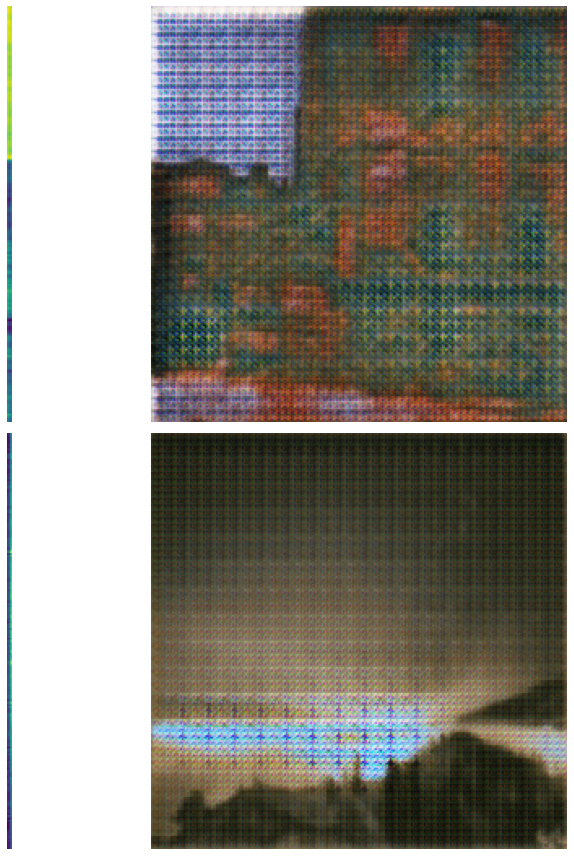

/Users/jules/Library/Caches/pypoetry/virtualenvs/img-gen-JnbHLy0k-py3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jules/Library/Caches/pypoetry/virtualenvs/img-gen-JnbHLy0k-py3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jules/workspace/img-gen/img_gen/cycle_gan.py", line 438, in fit
    ckpt_save_path = ckpt_manager.save()
  File "/Users/jules/workspace/img-gen/img_gen/cycle_gan.py", line 422, in train
    while prev_done < percent_done:
  File "/Users/jules/workspace/img-gen/img_gen/cycle_gan.py", line 346, in generate_images
    plt.subplot(2, 2, i + 1)
AttributeError: 'CycleGAN' object has no attribute 'save_images'

  warnings.warn("Estimator fit failed. Th

epoch: 0 .................

In [16]:
# build model

from img_gen.cycle_gan import find_optimal_cycle_gan

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

cyc_gan = find_optimal_cycle_gan(train_x, train_y, test_x, test_y, use_cloud=True)

In [ ]:
cyc_gan.print_losses()
cyc_gan.plot_losses()

NameError: name 'cyc_gan' is not defined

In [ ]:
print("Test Results")
cyc_gan.generate_images(test_x, test_y)

In [ ]:
gen_g_loss, gen_f_loss, dis_x_loss, dis_y_loss = cyc_gan.scores(test_x, test_y)
print("Test Losses")
print(f"gen_g: {gen_g_loss}, gen_f: {gen_f_loss}, dis_x: {dis_x_loss}, dis_y: {dis_y_loss}")